In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import cv2

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

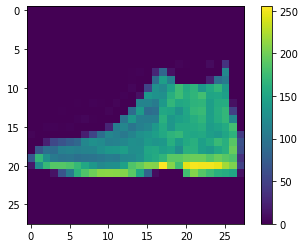

In [6]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images[0].shape
test_images.shape

(10000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
train_labels[0]

9

In [10]:
np.min(train_labels)

0

In [11]:
class_name = ['Camiseta','Pantalón','Suéter','Vestido','Abrigo','Sandalia','Camisa','Zapatilla deportiva','Bolso','Botin']

In [12]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
train_images=train_images/255
test_images = test_images/255

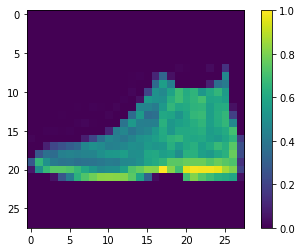

In [14]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

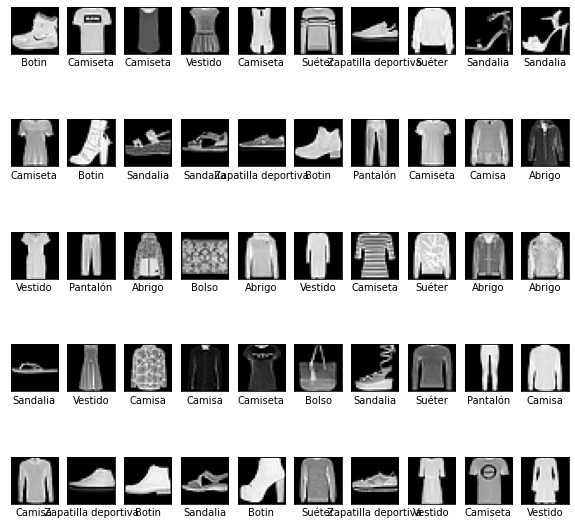

In [15]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='gray')
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [19]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 717us/step - loss: 0.6044 - accuracy: 0.7912
Epoch 2/10
1875/1875 [==============================] - 1s 685us/step - loss: 0.4423 - accuracy: 0.8436
Epoch 3/10
1875/1875 [==============================] - 1s 702us/step - loss: 0.4123 - accuracy: 0.8557
Epoch 4/10
1875/1875 [==============================] - 1s 687us/step - loss: 0.3949 - accuracy: 0.8592
Epoch 5/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.3817 - accuracy: 0.8639
Epoch 6/10
1875/1875 [==============================] - 1s 681us/step - loss: 0.3725 - accuracy: 0.8672
Epoch 7/10
1875/1875 [==============================] - 1s 682us/step - loss: 0.3635 - accuracy: 0.8698
Epoch 8/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.3562 - accuracy: 0.8727
Epoch 9/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.3509 - accuracy: 0.8738
Epoch 10/10
1875/1875 [==============================] - 1s 687u

In [20]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Presición:',test_acc)

313/313 [==============================] - 0s 542us/step - loss: 0.4103 - accuracy: 0.8554
Presición: 0.855400025844574


In [21]:
prediccion = model.predict(test_images)

In [22]:
prediccion[0]

array([2.6532553e-06, 3.6709072e-10, 1.2132420e-05, 1.7321570e-07,
       3.7284728e-05, 8.4458264e-03, 2.9491368e-04, 1.0138429e-01,
       4.6178131e-04, 8.8936096e-01], dtype=float32)

In [23]:
np.max(prediccion[0])

0.88936096

In [24]:
np.argmax(prediccion[0])

9

In [25]:
response = requests.get('https://www.turopalaboral.com/2893-home_default/camiseta-s6600-manga-corta-pack-3-unidades-workteam.jpg')

In [26]:
img=Image.open(BytesIO((response.content)))

In [27]:
img2=np.array(img)

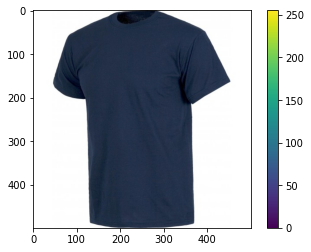

In [28]:
plt.figure()
plt.imshow(img2)
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
img2.shape

(500, 500, 3)

In [30]:
img2 = 255 - img2

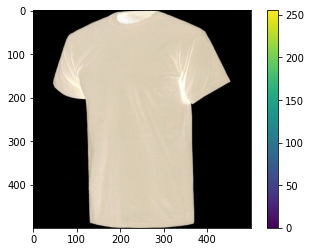

In [31]:
plt.figure()
plt.imshow(img2)
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.333,0.333,0.333])

In [33]:
img3=rgb2gray(img2)

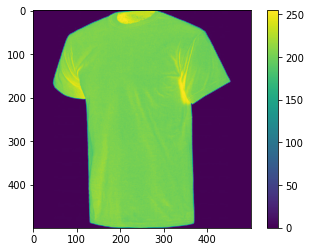

In [34]:
plt.figure()
plt.imshow(img3)
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
img3.shape

(500, 500)

In [36]:
img4 = cv2.resize(img3,dsize=(28,28),interpolation=cv2.cv2.INTER_CUBIC)

In [37]:
img4.shape

(28, 28)

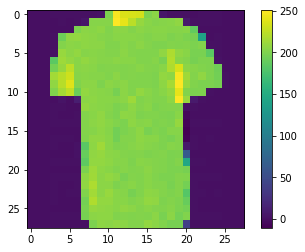

In [38]:
plt.figure()
plt.imshow(img4)
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
img4 = img4/255

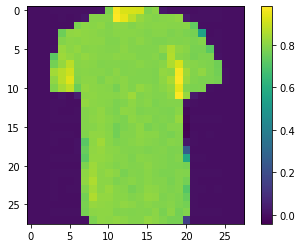

In [40]:
plt.figure()
plt.imshow(img4)
plt.colorbar()
plt.grid(False)
plt.show()

In [41]:
x=np.zeros((1,28,28))

In [42]:
x

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0

In [43]:
x[0]=np.array(img4)

In [44]:
x

array([[[ 0.00000000e+00,  0.00000000e+00, -5.67916391e-05,
          2.68410080e-03,  4.63721501e-03,  4.63721501e-03,
          4.63721501e-03,  4.63721501e-03,  4.33452549e-03,
          8.66630335e-03,  7.79010215e-01,  9.70429894e-01,
          9.22901649e-01,  9.18566949e-01,  9.17187304e-01,
          7.83506707e-01,  8.03379895e-01,  1.94397550e-02,
          4.38381955e-03,  4.16309805e-03,  4.68037174e-03,
          5.36709828e-04,  4.63721501e-03,  4.22603292e-03,
          4.22603292e-03,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -5.13971771e-05,
          0.00000000e+00,  3.97072341e-03,  0.00000000e+00,
          4.22603432e-03,  1.92723441e-02,  7.94691732e-01,
          7.94663913e-01,  7.96731007e-01,  9.80831146e-01,
          9.42369832e-01,  8.75492841e-01,  8.18635479e-01,
          8.01917043e-01,  7.93586995e-01,  7.98055932e-01,
          7.99233136e-01,  8.10193002e-01,  3.18182000e-02,
          4.5

In [45]:
prediccion2 = model.predict(x)

In [46]:
prediccion2

array([[9.8025972e-01, 6.2934149e-08, 1.2976048e-05, 1.6317776e-05,
        1.3835540e-07, 8.2913072e-11, 1.9710863e-02, 3.8482225e-24,
        2.6564260e-08, 2.2607692e-17]], dtype=float32)

In [47]:
np.argmax(prediccion2[0])

0

In [48]:
index = np.arange(len(class_name))

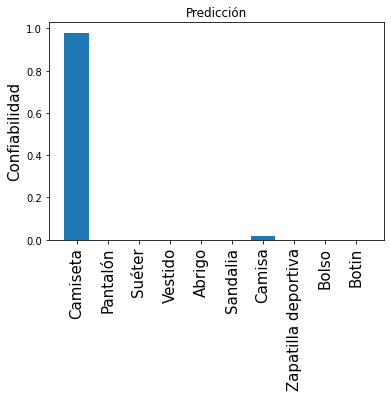

In [50]:
plt.bar(index,prediccion2[0])
plt.ylabel('Confiabilidad',fontsize=15)
plt.xticks(index,class_name,fontsize=15,rotation=90)
plt.title('Predicción')
plt.show()

In [51]:
checkpoint_path = 'ckeckpoint/check'
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True)
model.fit(train_images,train_labels,epochs=10,callbacks=[cp_callbacks])

Epoch 1/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.3403 - accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.3352 - accuracy: 0.8794
Epoch 3/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.3308 - accuracy: 0.8809
Epoch 4/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.3260 - accuracy: 0.8823
Epoch 5/10
1875/1875 [==============================] - 1s 764us/step - loss: 0.3237 - accuracy: 0.8833
Epoch 6/10
1875/1875 [==============================] - 2s 828us/step - loss: 0.3185 - accuracy: 0.8844
Epoch 7/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.3155 - accuracy: 0.8856
Epoch 8/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.3127 - accuracy: 0.8855
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3104 - accuracy: 0.8863
Epoch 10/10
1875/1875 [==============================] - 1s 682us/

In [53]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Precisión:',test_acc)

313/313 [==============================] - 0s 519us/step - loss: 0.3934 - accuracy: 0.8598
Precisión: 0.8597999811172485


In [54]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [55]:
model2.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [56]:
_,test_acc = model2.evaluate(test_images,test_labels)
print('Precisión:',test_acc)

313/313 [==============================] - 0s 513us/step - loss: 2.5312 - accuracy: 0.1001
Precisión: 0.10010000318288803


In [57]:
model2.load_weights(checkpoint_path)

In [58]:
_,test_acc = model2.evaluate(test_images,test_labels)
print('Precisión:',test_acc)

313/313 [==============================] - 0s 532us/step - loss: 0.3934 - accuracy: 0.8598
Precisión: 0.8597999811172485
